# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_results.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_information
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
address
sample_id_given_by_the_sample_provider
submitting_lab
sample_id_given_by_the_submitting_laboratory
authors
submitter
submission_date
query
strand
%n
length(nt)
length(aa)
#muts
%muts
#uniquemuts
%uniquemuts
#existingmuts
%existingmuts
symbol
reference
uniquemutlist
existingmutlist
clade
ifexistspecialchar


# Preprocessing and cleaning the data

In [4]:
#important features
start_data_row = 0
Final_data_row = 1129
Data = data.loc[start_data_row:Final_data_row, ['status','%n','length(nt)','length(aa)',
                                                   '%muts','%uniquemuts','%existingmuts','existingmutlist','clade']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#removing the % from the data
Data['%n'] = Data['%n'].str.replace('%', ' ') 
Data['%muts'] = Data['%muts'].str.replace('%', ' ') 
Data['%uniquemuts'] = Data['%uniquemuts'].str.replace('%', ' ') 
Data['%existingmuts'] = Data['%existingmuts'].str.replace('%', ' ') 
Data['%n'].astype(float)
Data['%muts'].astype(float)
Data['%uniquemuts'].astype(float)
Data['%existingmuts'].astype(float)

0       0.05
1       0.04
2       0.06
3       0.03
4       0.02
        ... 
1123    0.05
1124    0.05
1125    0.05
1126    0.07
1127    0.06
Name: %existingmuts, Length: 1128, dtype: float64

In [6]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)
Data.dropna(subset = ['existingmutlist'], inplace=True)
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='n/a'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='NA'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='-'].index, inplace=True)

Data.drop(Data.loc[Data['status']=='Unknown'].index, inplace=True)

Data.index = range(len(Data))

In [7]:
#chacking if there is any null data in ExistingMutList
for i in range(len(Data)):
    if pd.isnull(Data.existingmutlist[i]) is True:
        print('True')

In [8]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)

In [9]:
#Labeling
Data.replace(['Deceased'],value= [1], inplace=True)
Data.status[Data['status'] != 1]=0

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['existingmutlist']]),pd.get_dummies(Data[['clade']]), Data[['status','%n','length(nt)','length(aa)',
                                                   '%muts','%uniquemuts']]], axis=1)
Data_model.head()

,existingmutlist_(E_T30I),"existingmutlist_(NS3_G196V,NS8_G8R,NS8_L84S)",existingmutlist_(NS3_G251V),"existingmutlist_(NS7b_T40I,NS8_L84S)",existingmutlist_(NS8_L84S),"existingmutlist_(NS8_L84S,N_G238C)","existingmutlist_(NS8_L84S,N_S202N)","existingmutlist_(NSP10_T111I,NSP12_P323L,Spike_D614G,N_N140T,N_G97S)",existingmutlist_(NSP10_T51A),"existingmutlist_(NSP12_A449T,NSP12_P323L,Spike_D614G,NS3_Q57H,NS7a_V24F)",...,clade_G,clade_Other,clade_S,clade_V,status,%n,length(nt),length(aa),%muts,%uniquemuts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29890,9710,0.04,0.00
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29859,9710,0.04,0.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.00,29917,9710,0.05,0.01
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29892,9710,0.08,0.01
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.00,29828,9710,0.02,0.00


In [11]:
#checking the balance in the data
Data_model['status'].value_counts()

0    894
1     39
Name: status, dtype: int64

In [12]:
#Separating target (label) data
X = Data_model.drop('status',axis=1).astype(float)
y = Data_model.status
y=y.astype(int)
y.value_counts()
X

,existingmutlist_(E_T30I),"existingmutlist_(NS3_G196V,NS8_G8R,NS8_L84S)",existingmutlist_(NS3_G251V),"existingmutlist_(NS7b_T40I,NS8_L84S)",existingmutlist_(NS8_L84S),"existingmutlist_(NS8_L84S,N_G238C)","existingmutlist_(NS8_L84S,N_S202N)","existingmutlist_(NSP10_T111I,NSP12_P323L,Spike_D614G,N_N140T,N_G97S)",existingmutlist_(NSP10_T51A),"existingmutlist_(NSP12_A449T,NSP12_P323L,Spike_D614G,NS3_Q57H,NS7a_V24F)",...,"existingmutlist_(Spike_T307I,NS3_G251V)",clade_G,clade_Other,clade_S,clade_V,%n,length(nt),length(aa),%muts,%uniquemuts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29890.0,9710.0,0.04,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29859.0,9710.0,0.04,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.00,29917.0,9710.0,0.05,0.01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.00,29892.0,9710.0,0.08,0.01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.00,29828.0,9710.0,0.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.44,29903.0,9710.0,0.05,0.00
929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.45,29903.0,9710.0,0.05,0.00
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.44,29903.0,9710.0,0.05,0.00
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.45,29903.0,9710.0,0.07,0.00


### Scaling the data

In [13]:


# Scaling the data to standarize them
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_normal_scaled = X_scaled[y == 0] 
X_deseased_scaled = X_scaled[y == 1] 


In [14]:
len(X_deseased_scaled)

39

## Simple feedforward autoencoder

# from keras.layers import Input, Dense, BatchNormalization
from keras.models import Model
from keras import regularizers
from keras.layers import Input, Dense, BatchNormalization
# Building the Encoder network 
window_length = 410
encoding_dim = 30
epochs = 300
input_window = Input(shape=(window_length,))
x = Dense(100, activation='tanh')(input_window)
x = BatchNormalization()(x)
encoded = Dense(encoding_dim, activation='tanh')(x)
# "decoded" is the lossy reconstruction of the input
x = Dense(100, activation='tanh')(encoded)
x = BatchNormalization()(x)
decoded = Dense(window_length, activation='tanh')(x)
# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_normal_scaled, X_normal_scaled,
                epochs=epochs,
                batch_size=16)
# Separating the points encoded by the Auto-encoder as normal and fraud 
decoded_X_normal = autoencoder.predict(X_normal_scaled)
decoded_X_deseased = autoencoder.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 

In [15]:
# import keras
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense

window_length = 410
encoding_dim = 200
epochs = 500


# this is our input placeholder
input_window = Input(shape=(window_length,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_window)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(window_length, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_window, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_window, encoded)


autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(X_normal_scaled, X_normal_scaled,
                epochs=epochs,
                batch_size=1024,
                shuffle=True,
                validation_split = 0.2)

# Separating the points encoded by the Auto-encoder as normal and fraud 
decoded_X_normal = autoencoder.predict(X_normal_scaled)
decoded_X_deseased = autoencoder.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 



Using TensorFlow backend.
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Azadeh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 410)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               82200     
_________________________________________________________________
dense_2 (Dense)              (None, 410)               82410     
Total params: 164,610
Trainable params: 164,610
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 715 samples, validate on 179 samples
Epoch 1/500
715/715 [==============================] - 0s 316us/step - loss: 0.7379 - val_loss: 0.6987
Epoch 2/500
715/715 [==============================] - 0s 47us/step - loss: 0.6935 - val_loss: 0.6585
Epoch 3/500


715/715 [==============================] - 0s 56us/step - loss: -0.5902 - val_loss: 0.1253
Epoch 68/500
715/715 [==============================] - 0s 60us/step - loss: -0.6062 - val_loss: 0.1256
Epoch 69/500
715/715 [==============================] - 0s 52us/step - loss: -0.6217 - val_loss: 0.1259
Epoch 70/500
715/715 [==============================] - 0s 49us/step - loss: -0.6374 - val_loss: 0.1261
Epoch 71/500
715/715 [==============================] - 0s 49us/step - loss: -0.6523 - val_loss: 0.1264
Epoch 72/500
715/715 [==============================] - 0s 48us/step - loss: -0.6666 - val_loss: 0.1266
Epoch 73/500
715/715 [==============================] - 0s 47us/step - loss: -0.6805 - val_loss: 0.1267
Epoch 74/500
715/715 [==============================] - 0s 52us/step - loss: -0.6935 - val_loss: 0.1268
Epoch 75/500
715/715 [==============================] - 0s 44us/step - loss: -0.7063 - val_loss: 0.1268
Epoch 76/500
715/715 [==============================] - 0s 46us/step - loss: 

Epoch 146/500
715/715 [==============================] - 0s 52us/step - loss: -1.2415 - val_loss: 0.0267
Epoch 147/500
715/715 [==============================] - 0s 52us/step - loss: -1.2444 - val_loss: 0.0259
Epoch 148/500
715/715 [==============================] - 0s 53us/step - loss: -1.2470 - val_loss: 0.0249
Epoch 149/500
715/715 [==============================] - 0s 56us/step - loss: -1.2496 - val_loss: 0.0241
Epoch 150/500
715/715 [==============================] - 0s 59us/step - loss: -1.2519 - val_loss: 0.0232
Epoch 151/500
715/715 [==============================] - 0s 73us/step - loss: -1.2542 - val_loss: 0.0223
Epoch 152/500
715/715 [==============================] - 0s 68us/step - loss: -1.2564 - val_loss: 0.0214
Epoch 153/500
715/715 [==============================] - 0s 89us/step - loss: -1.2586 - val_loss: 0.0204
Epoch 154/500
715/715 [==============================] - 0s 110us/step - loss: -1.2606 - val_loss: 0.0194
Epoch 155/500
715/715 [==============================]

Epoch 224/500
715/715 [==============================] - 0s 56us/step - loss: -1.3215 - val_loss: -0.0566
Epoch 225/500
715/715 [==============================] - 0s 56us/step - loss: -1.3220 - val_loss: -0.0575
Epoch 226/500
715/715 [==============================] - 0s 59us/step - loss: -1.3226 - val_loss: -0.0586
Epoch 227/500
715/715 [==============================] - 0s 56us/step - loss: -1.3232 - val_loss: -0.0596
Epoch 228/500
715/715 [==============================] - 0s 60us/step - loss: -1.3237 - val_loss: -0.0607
Epoch 229/500
715/715 [==============================] - 0s 61us/step - loss: -1.3242 - val_loss: -0.0616
Epoch 230/500
715/715 [==============================] - 0s 71us/step - loss: -1.3247 - val_loss: -0.0624
Epoch 231/500
715/715 [==============================] - 0s 53us/step - loss: -1.3252 - val_loss: -0.0634
Epoch 232/500
715/715 [==============================] - 0s 68us/step - loss: -1.3256 - val_loss: -0.0643
Epoch 233/500
715/715 [=======================

Epoch 302/500
715/715 [==============================] - 0s 54us/step - loss: -1.3436 - val_loss: -0.0978
Epoch 303/500
715/715 [==============================] - 0s 52us/step - loss: -1.3437 - val_loss: -0.0979
Epoch 304/500
715/715 [==============================] - 0s 55us/step - loss: -1.3438 - val_loss: -0.0979
Epoch 305/500
715/715 [==============================] - 0s 59us/step - loss: -1.3439 - val_loss: -0.0981
Epoch 306/500
715/715 [==============================] - 0s 53us/step - loss: -1.3440 - val_loss: -0.0983
Epoch 307/500
715/715 [==============================] - 0s 55us/step - loss: -1.3440 - val_loss: -0.0983
Epoch 308/500
715/715 [==============================] - 0s 56us/step - loss: -1.3442 - val_loss: -0.0984
Epoch 309/500
715/715 [==============================] - 0s 52us/step - loss: -1.3443 - val_loss: -0.0985
Epoch 310/500
715/715 [==============================] - 0s 50us/step - loss: -1.3443 - val_loss: -0.0985
Epoch 311/500
715/715 [=======================

Epoch 380/500
715/715 [==============================] - 0s 57us/step - loss: -1.3482 - val_loss: -0.1010
Epoch 381/500
715/715 [==============================] - 0s 50us/step - loss: -1.3482 - val_loss: -0.1011
Epoch 382/500
715/715 [==============================] - 0s 49us/step - loss: -1.3483 - val_loss: -0.1011
Epoch 383/500
715/715 [==============================] - 0s 52us/step - loss: -1.3483 - val_loss: -0.1011
Epoch 384/500
715/715 [==============================] - 0s 49us/step - loss: -1.3483 - val_loss: -0.1011
Epoch 385/500
715/715 [==============================] - 0s 80us/step - loss: -1.3484 - val_loss: -0.1011
Epoch 386/500
715/715 [==============================] - 0s 64us/step - loss: -1.3484 - val_loss: -0.1012
Epoch 387/500
715/715 [==============================] - 0s 114us/step - loss: -1.3484 - val_loss: -0.1012
Epoch 388/500
715/715 [==============================] - 0s 114us/step - loss: -1.3485 - val_loss: -0.1012
Epoch 389/500
715/715 [=====================

Epoch 458/500
715/715 [==============================] - 0s 66us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 459/500
715/715 [==============================] - 0s 69us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 460/500
715/715 [==============================] - 0s 81us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 461/500
715/715 [==============================] - 0s 80us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 462/500
715/715 [==============================] - 0s 88us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 463/500
715/715 [==============================] - 0s 70us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 464/500
715/715 [==============================] - 0s 73us/step - loss: -1.3497 - val_loss: -0.1013
Epoch 465/500
715/715 [==============================] - 0s 77us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 466/500
715/715 [==============================] - 0s 120us/step - loss: -1.3497 - val_loss: -0.1014
Epoch 467/500
715/715 [======================

# import keras
from keras.layers import Input, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras import regularizers 
# Building the Input Layer 
window_length = 410
input_layer =  Input(shape=(window_length,))

# Building the Encoder network 
decoded = Dense(100, activation ='tanh')(input_layer) 

# Building the Decoder network 

# Building the Output Layer 
output_layer = Dense(X.shape[1], activation ='tanh')(decoded) 
#Step 8: Defining and Training the Auto-encoder
# Defining the parameters of the Auto-encoder network 
autoencoder = Model(input_layer, output_layer) 
autoencoder.compile(optimizer ="adam", loss ="mse") 
# Training the Auto-encoder network 
autoencoder.fit(X_normal_scaled, X_normal_scaled,  
                batch_size = 16, epochs = 300)

hidden_representation = Sequential() 
hidden_representation.add(autoencoder.layers[0]) 
hidden_representation.add(autoencoder.layers[1]) 


# Separating the points encoded by the Auto-encoder as alive and deseased 
decoded_X_normal = hidden_representation.predict(X_normal_scaled)
decoded_X_deseased = hidden_representation.predict(X_deseased_scaled)
# Combining the encoded points into a single table  
encoded_X = np.append(decoded_X_normal, decoded_X_deseased, axis = 0) 
y_normal = np.zeros(decoded_X_normal.shape[0]) 
y_deceased = np.ones(decoded_X_deseased.shape[0]) 
encoded_y = np.append(y_normal, y_deceased) 

In [16]:
#splitting features and the label: 20% test data and 80% assigned to training data
# split into train/test sets with same class ratio
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, encoded_y, test_size=0.2, random_state=5, stratify=y)


### Balancing the data

# balancing the data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
over = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)


In [17]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed

In [18]:
# Scaling the data

#Scaling the data to standarize them
#Here caling reduced the iteration number from 200 to 50
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Logistic regression model

In [19]:
#fitting the model and get the conversion probabilities. 
#predit_proba() function of our model assigns probability for each row:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', penalty='l2',max_iter=300)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
lr_probs = model.predict_proba(X_test)[:,1]
#Return the mean accuracy on the given test data and taraining data to see if we have overfitting.score clculates R^2
print('R^2 _train=',model.score(X_train, y_train))
print('R^2 _test=',model.score(X_test, y_test))

R^2 _train= 0.8716690042075736
R^2 _test= 0.7219251336898396


C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Cross validation 

In [20]:
#Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('CV-scores_min = ',scores.min())
print('CV_scores_mean =', scores.mean())
print('CV_scores_max =', scores.max())

C:\Users\Azadeh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cross-Validation Accuracy Scores [0.86713287 0.85314685 0.88111888 0.87412587 0.87412587 0.84615385
 0.85211268 0.85915493 0.82394366 0.85915493]
CV-scores_min =  0.823943661971831
CV_scores_mean = 0.8590170392987295
CV_scores_max = 0.8811188811188811


In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df.head(50)

,Actual,Predicted
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,1.0
7,0.0,0.0
8,1.0,1.0
9,0.0,0.0


### Performance measurement metrics

In [22]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 0.27807486631016043
Mean Squared Error: 0.27807486631016043
Root Mean Squared Error: 0.5273280443046439


In [23]:
#Area Under ROC Curve (AUROC) metric
from sklearn.metrics import roc_auc_score
# Keep only the positive class
#lr_probs = [p[1] for p in lr_probs]
lr_probs
print( 'roc_auc =', roc_auc_score(y_test, lr_probs) )

roc_auc = 0.932780847145488


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.933


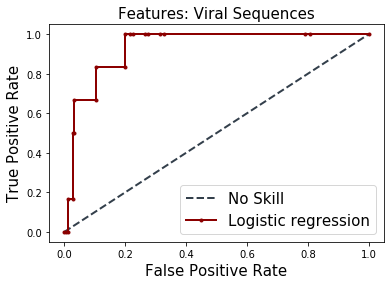

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill',  linewidth=2,  color = '#333F4B')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression', linewidth=2, color = 'darkred')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=15)
pyplot.ylabel('True Positive Rate',fontsize=15)
pyplot.title('Features: Viral Sequences',fontsize=15)
# show the legend
pyplot.legend(fontsize=15)
# show the plot
pyplot.show()

In [25]:
from sklearn.metrics import recall_score
recall_score(y_test, y_hat, average='weighted')


0.7219251336898396